In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [121]:
df= pd.read_csv('Company%28FRA%29.csv')

In [122]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [7]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [8]:
df.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [270]:
print('The number of rows:', df.shape[0],'\n''The number of columns:', df.shape[1])

The number of rows: 4256 
The number of columns: 51


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

* Here there are only numerical variables in the dataset.
* All variables are float hence there are no special characters etc.

In [272]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.00,2128.50,1228.75,1.00,1064.75,2128.50,3192.25,4256.00
Networth_Next_Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total_assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net_worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total_income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change_in_stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total_expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit_after_tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60


* Here we can see that the equity face value is a continous constant value for all the rows hence it is not a good predictor variable and can be excluded from the study.

In [9]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [10]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,395.3
1,0,36.2
2,0,84.0
3,0,2041.4
4,0,41.8
5,0,291.5
6,0,93.3
7,0,985.1
8,0,188.6
9,0,229.6


In [275]:
df['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [276]:
df['default'].value_counts(normalize= True)

0   0.79
1   0.21
Name: default, dtype: float64

* Here about 21 percentage of the companies comes under default.

In [277]:
df.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [278]:
print('The total number of null values in the dataset:',df.isnull().sum().sum())

The total number of null values in the dataset: 17778


In [279]:
print('The total number of values in the dataset:', df.size)

The total number of values in the dataset: 221312


In [280]:
print('The total percentage of missing values in the dataset:', (17778/221312)*100)

The total percentage of missing values in the dataset: 8.033003181029496


* 8% of the total dataset has null values.

In [11]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [282]:
df_X

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.30,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,...,5.65,3.99,3.37,14.87,8760056.00,10.00,4.44,4.44,827.60,NaN
1,2,36.20,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,3,84.00,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.40,NaN
3,4,2041.40,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,...,1.91,18.14,18.62,11.11,10000000.00,10.00,17.60,17.60,6883.50,NaN
4,5,41.80,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,...,68.00,45.87,28.67,19.93,107315.00,100.00,-6.52,-6.52,90.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,4252,0.20,0.40,0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.40,NaN
4252,4253,93.30,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,...,1.80,11.00,8.28,9.88,8162700.00,10.00,0.42,0.42,159.60,16.81
4253,4254,932.20,833.80,664.60,2314.70,32.10,2151.60,195.20,348.40,303.00,...,6.08,59.28,31.14,9.87,7479762.00,10.00,26.58,26.58,833.80,5.69
4254,4255,64.60,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.00,NaN


In [12]:
# outlier detection
UL= df_X.quantile(0.95)
LL= df_X.quantile(0.05)

In [13]:
print('Total number of outliers in the dataset:',((df_X > UL) | (df_X < LL)).sum().sum())

Total number of outliers in the dataset: 17903


In [14]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [15]:
print('Total number of outliers and null values:',df_X.isnull().sum().sum())

Total number of outliers and null values: 35681


In [16]:
print('Total percentage of null values and outliers:', (35681/221312)*100,'%')

Total percentage of null values and outliers: 16.122487709658763 %


* Since we have created a default variable based on networth next year, it is no longer useful for predictions.
* Also dropping equity face value and num.

In [17]:
df_X = df_X.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

In [18]:
df_X.shape

(4256, 48)

In [19]:
df1= pd.concat([df_X, df_Y], axis =1 )

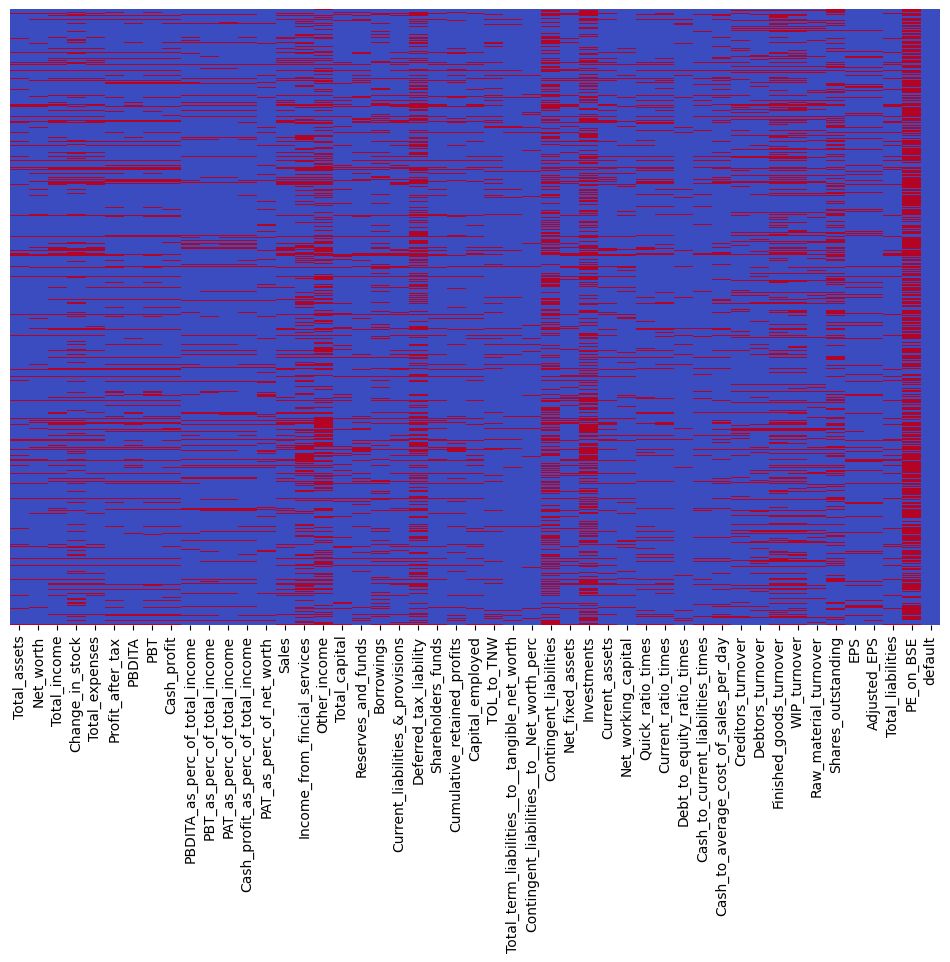

In [291]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [292]:
# Missing values by each row
df1.isnull().sum(axis = 1)

0        3
1        8
2        3
3        8
4        6
        ..
4251    32
4252     4
4253     2
4254     5
4255     2
Length: 4256, dtype: int64

In [20]:
# Filtering the data which has more than 90% of data in row level
df1_temp = df1[df1.isnull().sum(axis = 1) <= 5]

In [21]:
df1_temp.shape

(2285, 49)

* The total amount of rows has decreased from 4200 to 2285.
* The total dataset has about 16% of null and outliers combined.
* The dataset is not highly informative.

In [295]:
df1_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 4255
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total_assets                                    2285 non-null   float64
 1   Net_worth                                       2283 non-null   float64
 2   Total_income                                    2280 non-null   float64
 3   Change_in_stock                                 2152 non-null   float64
 4   Total_expenses                                  2277 non-null   float64
 5   Profit_after_tax                                2256 non-null   float64
 6   PBDITA                                          2281 non-null   float64
 7   PBT                                             2256 non-null   float64
 8   Cash_profit                                     2266 non-null   float64
 9   PBDITA_as_perc_of_total_income           

In [22]:
df1_temp['default'].value_counts()

0    1890
1     395
Name: default, dtype: int64

In [23]:
395/1890

0.20899470899470898

In [24]:
904/4256

0.212406015037594

* Total number of defaulters in original data: 904
* Total number of defaulters after excluding the rows: 395
* The proportion of defaulters remains same after removing several rows.

In [25]:
df1['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [299]:
# sorting the columns with the maximum amount of missing values in them.
df1.isnull().sum().sort_values(ascending = False)/df1.index.size

PE_on_BSE                                        0.66
Investments                                      0.44
Other_income                                     0.40
Contingent_liabilities                           0.39
Deferred_tax_liability                           0.38
Income_from_fincial_services                     0.30
Finished_goods_turnover                          0.29
Shares_outstanding                               0.27
WIP_turnover                                     0.26
Change_in_stock                                  0.22
Borrowings                                       0.19
Sales                                            0.16
Total_income                                     0.15
Raw_material_turnover                            0.15
Creditors_turnover                               0.14
Debtors_turnover                                 0.14
Total_expenses                                   0.14
PBT                                              0.13
Profit_after_tax            

In [26]:
# Dropping columns with more than 30% missing values
df2= df1.drop(['Income_from_fincial_services','Deferred_tax_liability','Contingent_liabilities','Other_income',
              'Investments','PE_on_BSE'], axis=1)

In [27]:
df2.shape

(4256, 43)

### Univariate and Bivariate analysis

In [302]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total_assets                                    3832 non-null   float64
 1   Net_worth                                       3835 non-null   float64
 2   Total_income                                    3621 non-null   float64
 3   Change_in_stock                                 3335 non-null   float64
 4   Total_expenses                                  3681 non-null   float64
 5   Profit_after_tax                                3690 non-null   float64
 6   PBDITA                                          3695 non-null   float64
 7   PBT                                             3690 non-null   float64
 8   Cash_profit                                     3691 non-null   float64
 9   PBDITA_as_perc_of_total_income           

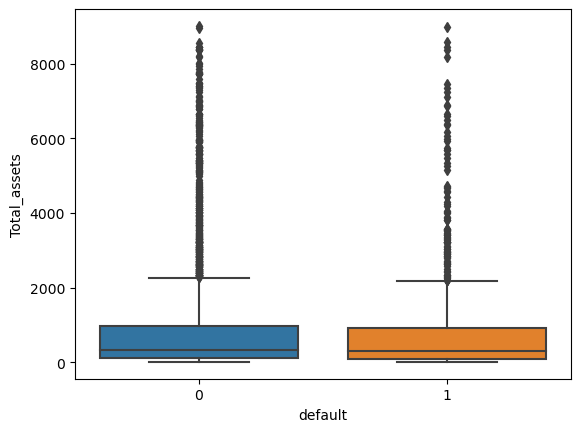

In [303]:
sns.boxplot(x=df2['default'],y=df2['Total_assets']);

* Total assests does not have much impact on defaulters.

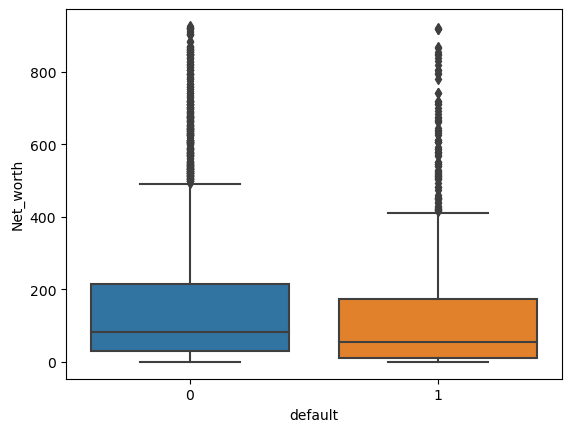

In [105]:
sns.boxplot(x=df2['default'], y= df2['Net_worth']);

* Even though the overall net worth of the defaulters are less compared to non defaulters, there is not much significance.

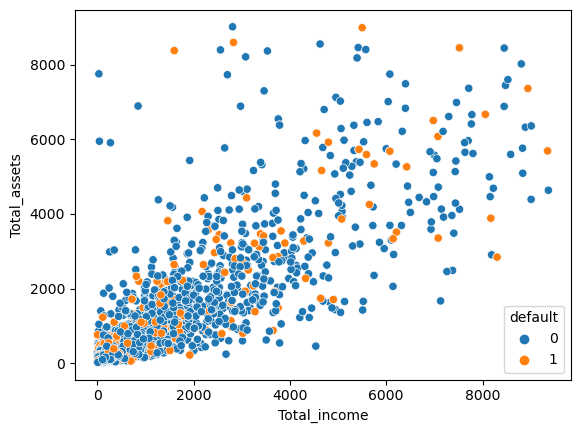

In [304]:
sns.scatterplot(x=df2['Total_income'], y= df2['Total_assets'], hue=df2['default']);

* Here an upward trend is visible, suggesting that as the total income increases the total assets also increases.
* Max number of companies lies in the range of 0-1500 in both total income and total assets.

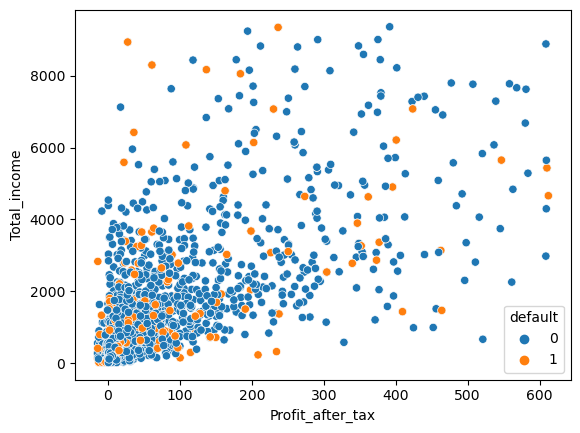

In [305]:
sns.scatterplot(y=df2['Total_income'], x= df2['Profit_after_tax'], hue=df2['default']);

* Most companies lies in between -25 to 50 units.
* Till 25units, we can say that companies with lesser total income has lesser profit after tax and after 25 units there is an upward trend as the income increases the total profit after tax also increases.

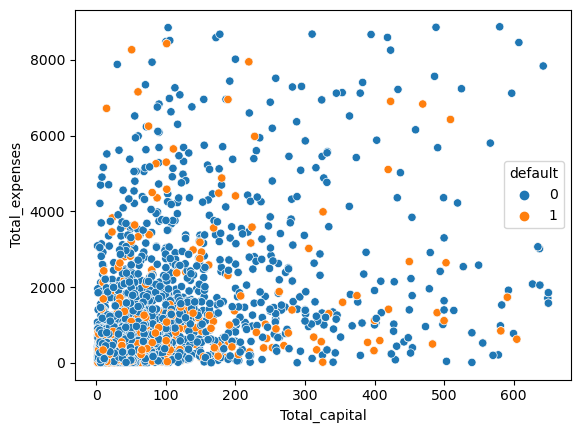

In [306]:
sns.scatterplot(x=df2['Total_capital'], y= df2['Total_expenses'], hue= df2['default']);

* Companies with less total capital are likely to have higher expenses.

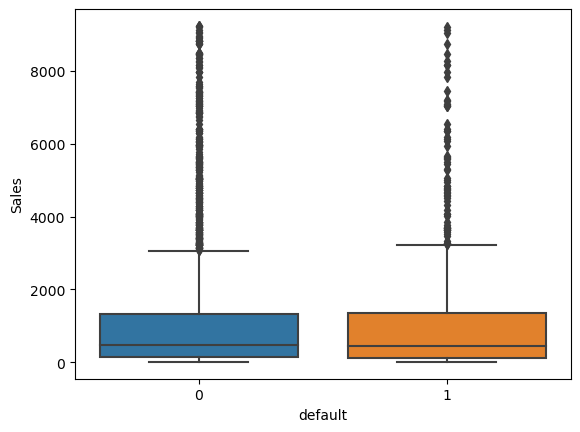

In [307]:
sns.boxplot(x=df2['default'], y=df2['Sales']);

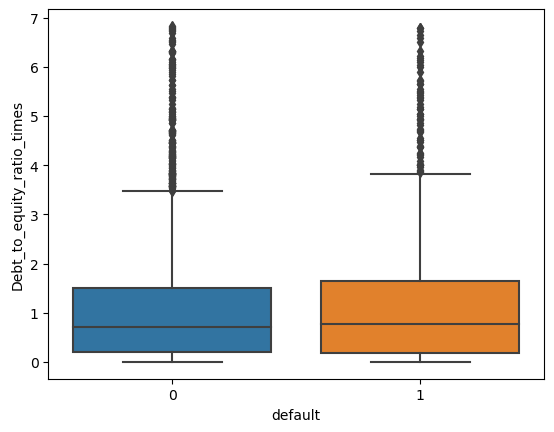

In [308]:
sns.boxplot(x=df2['default'], y=df2['Debt_to_equity_ratio_times']);

* From the above analysis, a significant difference between defaulters and non defaulters following a trend or pattern is not observed.
* No significant predictor variable was able to be identified.

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df2, test_size = 0.3)

In [29]:
Train_predictors = Train.drop('default', axis = 1)
Train_response = Train['default']

In [42]:
# Scaling the Train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Train1 = pd.DataFrame(scaler.fit_transform(Train_predictors), columns = Train_predictors.columns)

In [43]:
scaled_Train = pd.concat([scaled_Train1, Train_response], axis=1)

In [41]:
if not scaled_Train1.index.equals(Train_response.index):
    Train_response = Train_response.reset_index(drop=True)
    scaled_Train1 = scaled_Train1.reset_index(drop=True)

In [44]:
scaled_Train.shape

(2979, 43)

In [33]:
Test_predictors = Test.drop('default', axis = 1)
Test_response = Test['default']

In [38]:
# Scaling the Test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Test1 = pd.DataFrame(scaler.fit_transform(Test_predictors), columns = Test_predictors.columns)

In [39]:
scaled_Test = pd.concat([scaled_Test1, Test_response], axis = 1)

In [40]:
scaled_Test.shape

(1277, 43)

In [45]:
# Imputing the missing values
from sklearn.impute import KNNImputer

In [46]:
imputer = KNNImputer(n_neighbors=5)

In [47]:
df_imputed_train = pd.DataFrame(imputer.fit_transform(scaled_Train), columns = scaled_Train.columns)
df_imputed_test = pd.DataFrame(imputer.transform(scaled_Test), columns = scaled_Test.columns)

In [48]:
print(df_imputed_train.isnull().sum().sum())
print(df_imputed_test.isnull().sum().sum())

0
0


### Correlation between independent variables

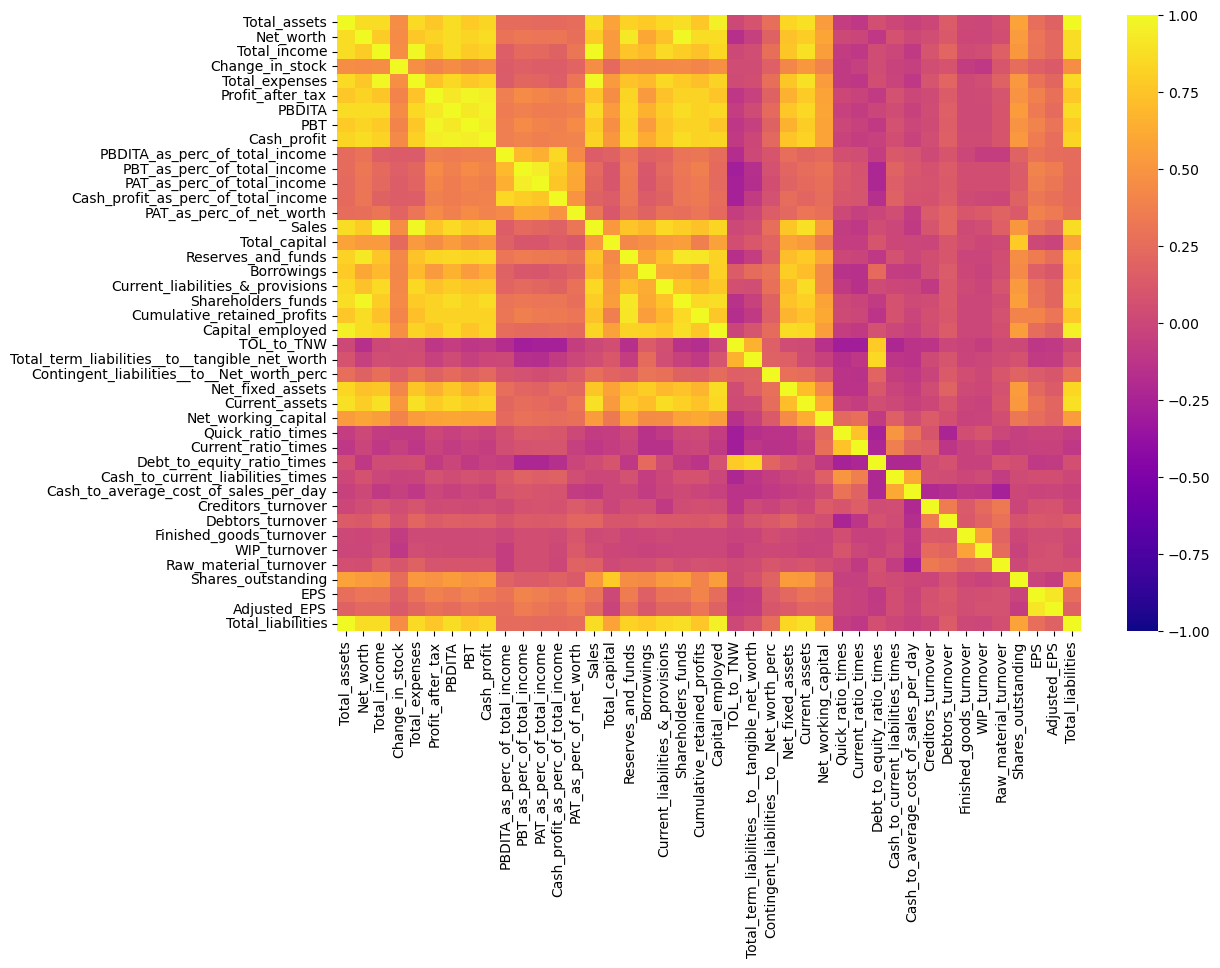

In [334]:
plt.figure(figsize = (12,8))
cor_matrix = df_imputed_train.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1);

* Since we can see a lot of positive correlation, there is a high multicollinearity visible here hence we have to use VIF to reduce the number of features.

In [49]:
X_train = df_imputed_train.drop('default', axis = 1)
y_train = df_imputed_train['default']
X_test = df_imputed_test.drop('default', axis = 1)
y_test = df_imputed_test['default']

### Model 1 - Logistic Regression

In [50]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
24,Contingent_liabilities__to__Net_worth_perc,1.196447
37,Raw_material_turnover,1.407050
33,Creditors_turnover,1.505992
35,Finished_goods_turnover,1.562286
3,Change_in_stock,1.573576
34,Debtors_turnover,1.576679
36,WIP_turnover,1.701949
32,Cash_to_average_cost_of_sales_per_day,1.789320
31,Cash_to_current_liabilities_times,2.030409
13,PAT_as_perc_of_net_worth,2.148994


* Here, we can see that the VIF is high for most of the variables and we are going to exclude those variables having a VIF greater than 5.


In [52]:
X_train_VIF= X_train[['Contingent_liabilities__to__Net_worth_perc', 'Raw_material_turnover', 'Change_in_stock' , 'Creditors_turnover' , 'Debtors_turnover' , 'Finished_goods_turnover' , 'WIP_turnover' , 'Cash_to_average_cost_of_sales_per_day' , 'PAT_as_perc_of_net_worth', 'Cash_to_current_liabilities_times' , 'Net_working_capital' , 'Current_ratio_times' , 'Shares_outstanding' , 'TOL_to_TNW' , 'Total_capital' , 'Quick_ratio_times' , 'Total_term_liabilities__to__tangible_net_worth' , 'PBDITA_as_perc_of_total_income','Cash_profit_as_perc_of_total_income']]

In [53]:
X_test_VIF=  X_test[['Contingent_liabilities__to__Net_worth_perc', 'Raw_material_turnover', 'Change_in_stock' , 'Creditors_turnover' , 'Debtors_turnover' , 'Finished_goods_turnover' , 'WIP_turnover' , 'Cash_to_average_cost_of_sales_per_day' , 'PAT_as_perc_of_net_worth', 'Cash_to_current_liabilities_times' , 'Net_working_capital' , 'Current_ratio_times' , 'Shares_outstanding' , 'TOL_to_TNW' , 'Total_capital' , 'Quick_ratio_times' , 'Total_term_liabilities__to__tangible_net_worth' , 'PBDITA_as_perc_of_total_income','Cash_profit_as_perc_of_total_income']]

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_VIF, y_train)
lr_y_pred = lr_model.predict(X_test_VIF)
lr_y_probs = lr_model.predict_proba(X_test_VIF)[:, 1]

# Confusion Matrices
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)


print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)

# Classification report
lr_class_rep = classification_report(y_test, lr_y_pred)


print("Logistic Regression Classification report:")
print(lr_class_rep)


Logistic Regression Confusion Matrix:
[[1014    2]
 [ 261    0]]
Logistic Regression Classification report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1016
         1.0       0.00      0.00      0.00       261

    accuracy                           0.79      1277
   macro avg       0.40      0.50      0.44      1277
weighted avg       0.63      0.79      0.70      1277



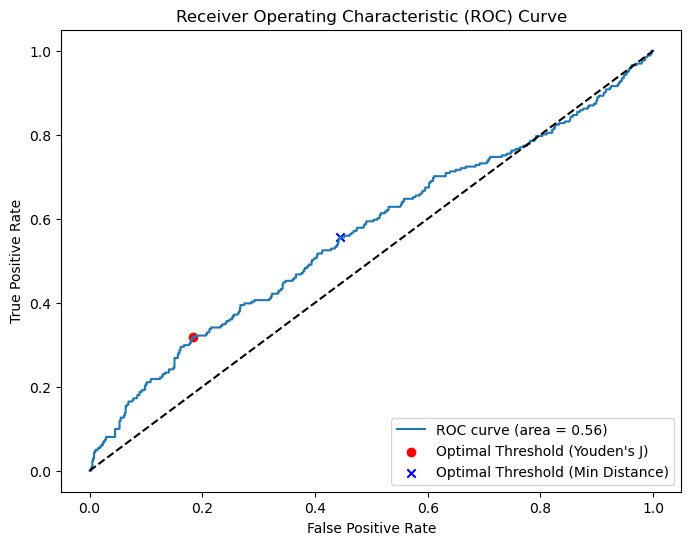

Optimal Threshold (Youden's J): 0.2548562610208426
Optimal Threshold (Min Distance): 0.21198159864695984


In [57]:
y_proba = lr_model.predict_proba(X_test_VIF)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the optimal threshold (Youden's J statistic)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute the optimal threshold (minimum distance to top-left corner)
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
optimal_idx_distance = np.argmin(distances)
optimal_threshold_distance = thresholds[optimal_idx_distance]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='r', label='Optimal Threshold (Youden\'s J)')
plt.scatter(fpr[optimal_idx_distance], tpr[optimal_idx_distance], marker='x', color='b', label='Optimal Threshold (Min Distance)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'Optimal Threshold (Youden\'s J): {optimal_threshold}')
print(f'Optimal Threshold (Min Distance): {optimal_threshold_distance}')

* Since we saw a very poor recall value for the model we will balance the data before fitting the model.

In [88]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_VIF, y_train)

# Fitting the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predicting probabilities
y_proba = model.predict_proba(X_test_VIF)[:, 1]

# Evaluating the model with a classification report
report = classification_report(y_test, y_pred_optimal)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.01      0.01      1029
           1       0.19      0.99      0.32       248

    accuracy                           0.20      1277
   macro avg       0.49      0.50      0.17      1277
weighted avg       0.66      0.20      0.07      1277



* Finally, we are able to achieve an excellent recall value with some overfitting. 
* Considering the opportunities such as outliers, missing values and correlated features this is a fair model.
* Even though the recall value is exceptional, the model has very low precision and accuracy.
* Since our major requirement is to predict the defaulters, this model has done an exceptional job.

### Model 2- Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
df2_X = df2.drop('default', axis = 1)
df2_Y = df2['default']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df2_X, df2_Y, test_size=0.3, random_state=42)

In [77]:
# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_pred = rf_model.predict(X_test)

In [79]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[876 153]
 [224  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1029
           1       0.14      0.10      0.11       248

    accuracy                           0.70      1277
   macro avg       0.47      0.47      0.47      1277
weighted avg       0.67      0.70      0.69      1277



* The model shows a very poor performance hence we can proceed to hyperparameter tuning methods.

#### Hyper-parameter tuning

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_model2 = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.80


In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[1005   24]
 [ 228   20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1029
           1       0.45      0.08      0.14       248

    accuracy                           0.80      1277
   macro avg       0.63      0.53      0.51      1277
weighted avg       0.75      0.80      0.74      1277



* The model has very poor recall value for predicting defaulters hence we cannot proceed with this model.

### Final model

* From all the above 4 models, the logistic regression model after balancing the train data is the best model to proceed.
* The recall value is an exceptional 99%.
* The model can clearly identify a defaulter, but shows poor performance in identifying a non-defaulter.
* Since the purpose is to minimise credit risk, this model helps the industry to identify possible defaulter so that they can no lend money to such companies. Hence they can reduce their credit risk.

In [89]:
# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': coefficients
})

# Sort the features by absolute value of coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the most important features
print(feature_importance)

                                           Feature  Coefficient  \
6                                     WIP_turnover     0.190075   
5                          Finished_goods_turnover    -0.184159   
3                               Creditors_turnover    -0.157833   
10                             Net_working_capital     0.151301   
8                         PAT_as_perc_of_net_worth    -0.097125   
14                                   Total_capital    -0.083058   
9                Cash_to_current_liabilities_times    -0.079641   
2                                  Change_in_stock    -0.074257   
7            Cash_to_average_cost_of_sales_per_day    -0.057136   
11                             Current_ratio_times    -0.053223   
0       Contingent_liabilities__to__Net_worth_perc    -0.051087   
12                              Shares_outstanding    -0.044827   
17                  PBDITA_as_perc_of_total_income    -0.037438   
18             Cash_profit_as_perc_of_total_income     0.03277

### Inferences

#### Class Imbalance:

* The model shows a significant imbalance in class performance.
* Class 0 (majority class) has 1029 instances, while class 1 (minority class) has only 248 instances.

#### Precision, Recall, and F1-Score:

Class 0:

* Precision: The precision for class 0 is 0.78, indicating that 78% of the predicted class 0 instances are correct.

* Recall: The recall for class 0 is extremely low at 0.01, meaning that only 1% of the actual class 0 instances are correctly identified.

Class 1:

* Precision: The precision for class 1 is 0.19, indicating that 19% of the predicted class 1 instances are correct.

* Recall: The recall for class 1 is very high at 0.99, meaning that 99% of the actual class 1 instances are correctly identified.

* The overall accuracy of the model is 0.20, which is quite low and indicates poor model performance. This low accuracy is primarily due to the model's inability to correctly identify class 0 instances.


* The features with the highest absolute coefficient values are considered the most important for the model's predictions. Here are the top features and their respective coefficients:

1) WIP_turnover: Coefficient = 0.190075

2) Finished_goods_turnover: Coefficient = -0.184159

3) Creditors_turnover: Coefficient = -0.157833

4) Net_working_capital: Coefficient = 0.151301

5) PAT_as_perc_of_net_worth: Coefficient = -0.097125

### Insights and Recommendations

#### 1) High Recall for Loan Defaults (Class 1):

* The model's ability to correctly identify 99% of loan defaults (high recall) is crucial for risk management. This ensures that almost all potential defaulters are flagged for further investigation or preemptive action.

#### 2) Feature Importance and Business Impact:

* ##### WIP_turnover (Work-in-progress turnover):
    Positive coefficient suggests that higher WIP turnover is associated with an increased likelihood of loan default. This could indicate that businesses with high inventory turnover in progress might be at financial risk.

* ##### Finished_goods_turnover:
    Negative coefficient indicates that higher turnover of finished goods is associated with a lower likelihood of default, suggesting that efficient sales and inventory management of finished goods are signs of financial health.

* ##### Creditors_turnover: 
    Negative coefficient implies that quicker payment of creditors is linked to a lower chance of default, highlighting the importance of managing payables efficiently.

* ##### Net_working_capital:
    Positive coefficient suggests that higher net working capital is linked to an increased likelihood of default, possibly indicating over-leveraging or liquidity issues.

* ##### PAT_as_perc_of_net_worth:
    Negative coefficient shows that higher profitability relative to net worth is associated with a lower likelihood of default, emphasizing the importance of profitability in maintaining financial stability.

* Focus on clients with high WIP turnover and low finished goods turnover, as these are indicative of higher default risk.
* Implement stricter credit policies or offer tailored financial products for businesses with high net working capital and low profitability ratios to mitigate risk.
* Encourage clients to improve their finished goods turnover by optimizing inventory management and sales processes.
* Advise clients to manage their payables more efficiently to improve creditors turnover, reducing the risk of cash flow issues.
* Provide financial advisory services to help businesses improve their profitability metrics, such as PAT as a percentage of net worth, which in turn reduces default risk.
* Offer liquidity solutions to businesses with high net working capital but facing potential liquidity issues to ensure they can meet their short-term obligations.

### Part B

In [90]:
df= pd.read_csv('Market_Risk_Data_coded.csv')

In [91]:
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [92]:
df.shape

(418, 6)

In [96]:
df.columns = df.columns.str.replace(' ', '_')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           418 non-null    datetime64[ns]
 1   ITC_Limited    418 non-null    int64         
 2   Bharti_Airtel  418 non-null    int64         
 3   Tata_Motors    418 non-null    int64         
 4   DLF_Limited    418 non-null    int64         
 5   Yes_Bank       418 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.7 KB


In [98]:
df['Date'] = [pd.to_datetime(d) for d in df['Date']]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           418 non-null    datetime64[ns]
 1   ITC_Limited    418 non-null    int64         
 2   Bharti_Airtel  418 non-null    int64         
 3   Tata_Motors    418 non-null    int64         
 4   DLF_Limited    418 non-null    int64         
 5   Yes_Bank       418 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.7 KB


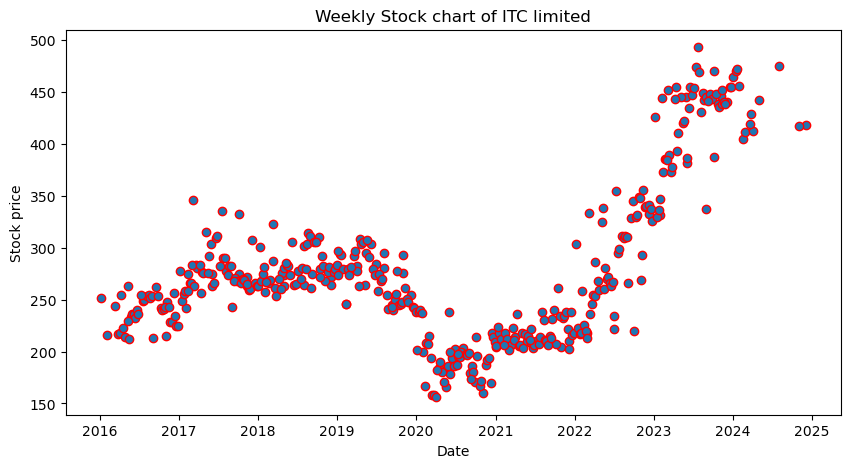

In [110]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], df['ITC_Limited'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title('Weekly Stock chart of ITC limited');

* From the year 2016-2019 the price did not have much movement and the stock was in a consolidation phase.
* From 2019-2020 the price of the stock fell down till 150.
* From 2020- till now the price of the stock has gained momentum and has reached more than 450.
* currently the stock is under consolidation or a possible trend reversal is possible.

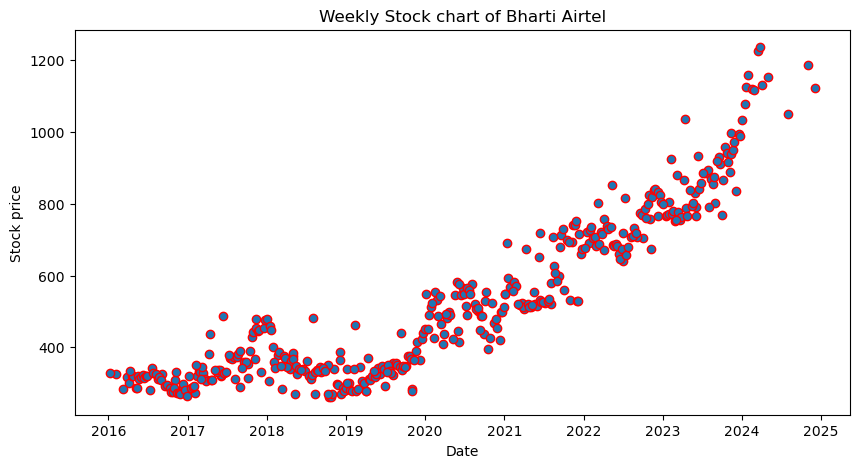

In [111]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], df['Bharti_Airtel'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title('Weekly Stock chart of Bharti Airtel');

* From the year 2016-2020 the price did not have much movement and the stock was in a consolidation phase.
* From 2020- till now the price of the stock has gained momentum and has reached more than 1200.
* currently the stock is following an uptrend.

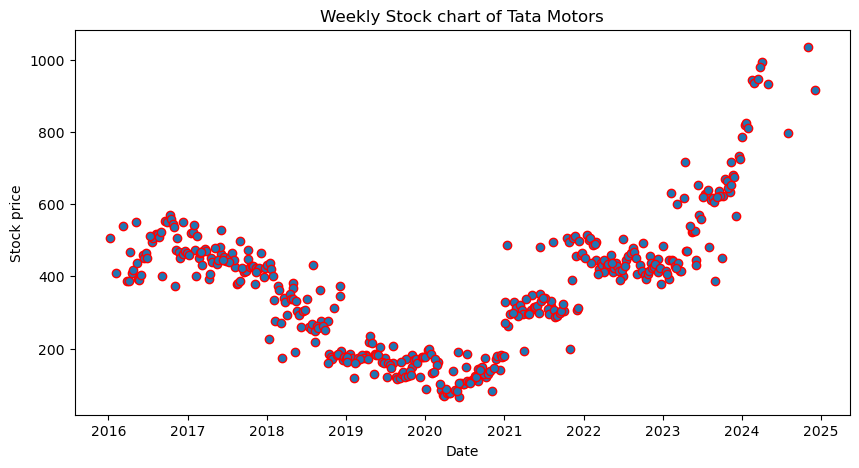

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], df['Tata_Motors'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title('Weekly Stock chart of Tata Motors');

* From the year 2016-2020 the price reduced and came down less than 200.
* From 2020- till now the price of the stock has gained momentum and has reached more than 1000.
* A trend reversal is found after 2020 and the stock is following an uptrend.

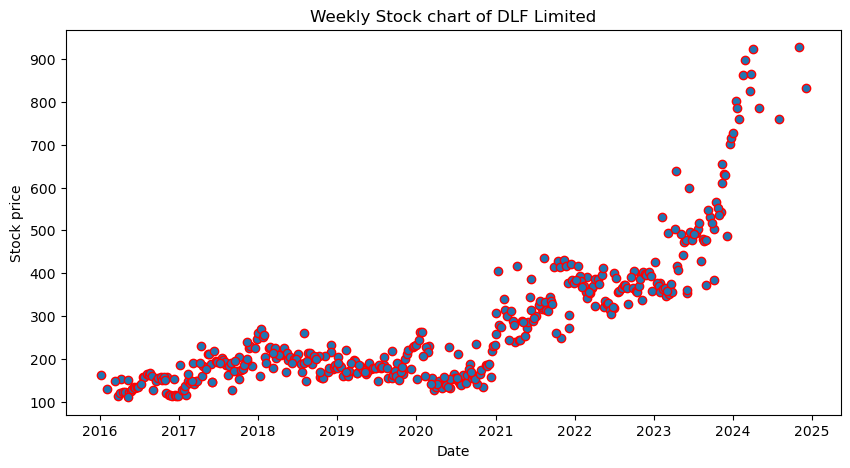

In [113]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], df['DLF_Limited'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title('Weekly Stock chart of DLF Limited');

* From the year 2016-2021 the price did not have much movement and the stock was in a consolidation phase.
* From 2020- till now the price of the stock has gained momentum and has reached more than 900.
* currently the stock is under consolidation.

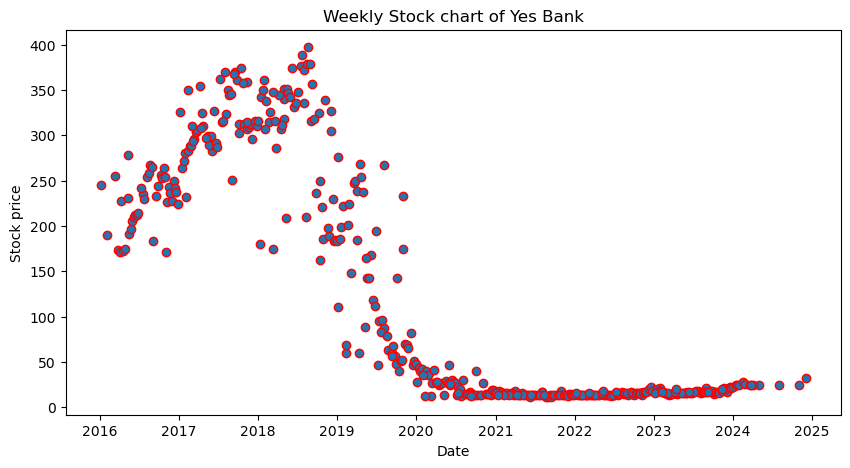

In [114]:
plt.figure(figsize=(10,5))
plt.scatter(df['Date'], df['Yes_Bank'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title('Weekly Stock chart of Yes Bank');

* From the year 2016-2019 the price went high and touched 400.
* From 2019-2020 a strong trend reversal is observed and the price dropped to less than 50
* From 2020- till now the price of the stock has not moved significantly and is under consolidation.
* currently no trend is being followed by the stock.

In [115]:
df.set_index('Date', inplace=True)

# Calculate weekly returns for each stock
returns = df.pct_change()

# Display the first few rows of the returns
print(returns.head())

            ITC_Limited  Bharti_Airtel  Tata_Motors  DLF_Limited  Yes_Bank
Date                                                                      
2016-03-28          NaN            NaN          NaN          NaN       NaN
2016-04-04     0.004608      -0.044304     0.000000     0.061404 -0.011561
2016-11-04    -0.013761       0.019868    -0.031088    -0.008264  0.000000
2016-04-18     0.037209       0.038961     0.090909     0.016667  0.005848
2016-04-25    -0.040359      -0.003125     0.024510     0.000000  0.017442


In [116]:
mean_returns = returns.mean()
std_returns = returns.std()

# Create a DataFrame to store the results
stats_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

In [117]:
stats_df

,Mean Return,Standard Deviation
ITC_Limited,0.002281,0.036127
Bharti_Airtel,0.004029,0.039073
Tata_Motors,0.004088,0.061976
DLF_Limited,0.006540,0.057796
Yes_Bank,-0.000475,0.091095


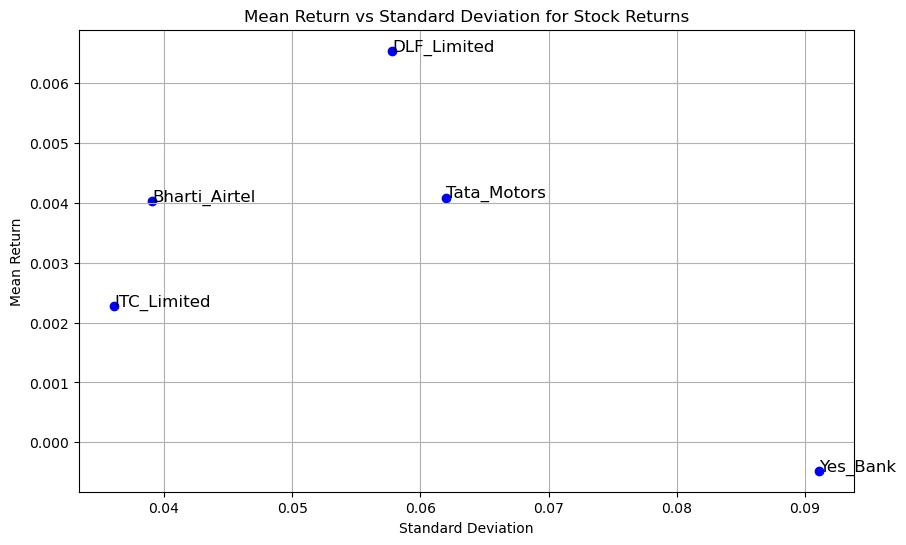

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(stats_df['Standard Deviation'], stats_df['Mean Return'], color='blue')
for i, txt in enumerate(stats_df.index):
    plt.annotate(txt, (stats_df['Standard Deviation'][i], stats_df['Mean Return'][i]), fontsize=12)

plt.title('Mean Return vs Standard Deviation for Stock Returns')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return')
plt.grid(True)
plt.show()

### Interpretation of the plot

* ITC_Limited and Bharti_Airtel have relatively low volatility and moderate mean returns.

* Tata_Motors and DLF_Limited have higher volatility compared to ITC_Limited and Bharti_Airtel, but also higher mean returns.

* Yes_Bank has the highest volatility and a negative mean return, indicating it is the riskiest and has been underperforming on average.

### Inferences

##### 1. ITC_Limited:

* Mean Return: 0.002281 (0.2281% per week)
    This means, on average, the stock has increased by 0.2281% each week.
* Standard Deviation: 0.036127 (3.6127% per week)
    This indicates the volatility of the stock. The weekly returns typically deviate by about 3.6127% from the mean return.

#####  2. Bharti_Airtel:

* Mean Return: 0.004029 (0.4029% per week)
    On average, the stock has increased by 0.4029% each week.
* Standard Deviation: 0.039073 (3.9073% per week)
    The weekly returns typically deviate by about 3.9073% from the mean return.

#####  3. Tata_Motors:

* Mean Return: 0.004088 (0.4088% per week)
    On average, the stock has increased by 0.4088% each week.
* Standard Deviation: 0.061976 (6.1976% per week)
    The weekly returns typically deviate by about 6.1976% from the mean return, indicating higher volatility compared to ITC Limited and Bharti Airtel.

#####  4. DLF_Limited:

* Mean Return: 0.006540 (0.6540% per week)
    On average, the stock has increased by 0.6540% each week.
* Standard Deviation: 0.057796 (5.7796% per week)
    The weekly returns typically deviate by about 5.7796% from the mean return, indicating moderate volatility.

#####  5. Yes_Bank:

* Mean Return: -0.000475 (-0.0475% per week)
    On average, the stock has decreased by 0.0475% each week.
* Standard Deviation: 0.091095 (9.1095% per week)
    The weekly returns typically deviate by about 9.1095% from the mean return, indicating the highest volatility among the five stocks.

* ##### Mean Return: 
    Indicates the average weekly performance of the stock. Positive values suggest that the stock has been increasing on average, while negative values indicate a decline.

* ##### Standard Deviation: 
    Measures the volatility of the stock returns. Higher values indicate more variability and thus higher risk. Lower values suggest more stable returns.

### Insights 

#### 1)Low Risk, Moderate Return:

##### ITC Limited and Bharti Airtel:

* Both stocks have relatively low volatility and offer moderate mean returns.

* These stocks might be suitable for risk-averse investors looking for more stable returns.

#### 2) Moderate to High Risk, High Return Potential:

##### Tata Motors and DLF Limited:

* These stocks exhibit higher volatility but also offer higher mean returns.

* Suitable for investors willing to take on more risk for the potential of higher returns.

#### 3) High Risk, Negative Return:

##### Yes Bank:

* This stock has the highest volatility and a negative mean return, indicating poor performance and high risk.

* It may not be a good investment option unless there is a specific strategy to leverage its volatility or there are expectations of a turnaround.

### Recommendations

* Diversify investments across stocks with different risk profiles. For example, combining ITC Limited and Bharti Airtel with Tata Motors and DLF Limited could balance the portfolio by mixing stability with high return potential.

* Assess your risk tolerance before investing. If you are risk-averse, prioritize stocks like ITC Limited and Bharti Airtel. If you can tolerate higher risk for potentially higher returns, consider including Tata Motors and DLF Limited.

* Regularly monitor the performance and volatility of the stocks. Rebalance the portfolio as necessary to maintain the desired risk-return profile.

* Be cautious with stocks like Yes Bank. Thoroughly research and understand the reasons behind its negative performance. Consider avoiding or limiting exposure to such high-risk stocks unless there is a compelling reason to invest.

* Stay updated with market trends and news related to these companies. External factors, market conditions, and company-specific news can significantly impact stock performance.

* Consider a long-term investment horizon to ride out short-term volatility, especially for higher-risk stocks. Long-term investments can often yield better returns and mitigate short-term risks.